# Setup

## Colab

In [7]:
# # # Mount the drive and move to dir
# from google.colab import drive
# drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
# # Switch to current dir
# %cd /content/drive/MyDrive/Coding/spread-res/runscr/

/content/drive/MyDrive/Coding/spread-res/runscr


## Imports

In [1]:
# Import importlib to reload modules and sys and os to add the path for other imports
import importlib
import os
import sys

import torch

# Append the parent directory to the path to import the necessary modules
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "..")))

from classes.models import BertPooler

# Import the utilities and the dataloader
from utils import inferutil, setuputil, trainutil

# Now reload the modules to ensure they are up-to-date
importlib.reload(setuputil)
importlib.reload(trainutil)
importlib.reload(inferutil)
importlib.reload(BertPooler)

# Import the model
from classes.models.BertPooler import BertPooler
from utils.inferutil import binfer_full, binfer_one, infer_full, infer_one

# Import the funcs needed from utils
from utils.setuputil import display_config, setup_config
from utils.trainutil import train_model

## Configuration

In [2]:
input_config = {
    # Environment and Model Info
    "env": "local",
    "approach": "bert",
    "model_name": "BertPooler",
    "model_base": "bert-base-cased",
    # System Configuration
    "device": "mps:0",
    "threads": 8,
    "seed": 0,
    # Data Configuration
    "data_dir": "../data",
    "data_ds": "manual",
    # Model Parameters
    "rows": 100,
    "cols": 100,
    "tokens": 32,
    # BERT Architecture Parameters
    "vocab_size": 30522,
    "hidden_size": 32,
    "num_hidden_layers": 1,
    "num_attention_heads": 1,
    "intermediate_size": 128,
    # Training Parameters
    "batch_size": 20,
    "lr": 1e-2,
    "mu": 0.25,
    "epochs": 3,
    "patience": 2,
    "save_int": 0,
    "save_dir": "../models/",
}
config = setup_config(input_config)
display_config(config)

# Define local variables from the config dictionary
DEVICE = config["DEVICE"]
THREADS = config["THREADS"]

# Data loaders and vocab
train_loader = config["train_loader"]
val_loader = config["val_loader"]
test_loader = config["test_loader"]
tokenizer = config["tokenizer"]
model_base = config["model_base"]

# Training parameters
batch_size = config["batch_size"]
lr = config["lr"]
mu = config["mu"]
epochs = config["epochs"]
patience = config["patience"]
save_int = config["save_int"]
save_dir = config["save_dir"]
save_name = config["save_name"]

Processing files: 100%|██████████| 40/40 [00:05<00:00,  7.83it/s]



40(P) = 40(G) + 0(E)


Processing files: 100%|██████████| 5/5 [00:00<00:00, 5445.73it/s]



5(P) = 5(G) + 0(E)


Processing files: 100%|██████████| 5/5 [00:00<00:00, 11137.29it/s]



5(P) = 5(G) + 0(E)
{
  "env": "local",
  "approach": "bert",
  "DEVICE": "<device>",
  "THREADS": 8,
  "seed": 0,
  "model_base": "bert-base-cased",
  "model_name": "BertPooler",
  "rows": 100,
  "cols": 100,
  "tokens": 32,
  "data_ds": "manual",
  "data_dir": "../data",
  "train_dir": "../data/manual_train",
  "val_dir": "../data/manual_val",
  "test_dir": "../data/manual_test",
  "tokenizer": "<BertTokenizerFast>",
  "vocab_size": 30522,
  "hidden_size": 32,
  "num_hidden_layers": 1,
  "num_attention_heads": 1,
  "intermediate_size": 128,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "attention_probs_dropout_prob": 0.1,
  "max_position_embeddings": 64,
  "type_vocab_size": 2,
  "initializer_range": 0.02,
  "layer_norm_eps": 1e-12,
  "pad_token_id": 0,
  "gradient_checkpointing": false,
  "train_loader": "<LoaderBert>",
  "val_loader": "<LoaderBert>",
  "test_loader": "<LoaderBert>",
  "batch_size": 20,
  "lr": 0.01,
  "mu": 0.25,
  "epochs": 3,
  "patience": 2,
  "save_in

# Model Creation

In [3]:
# 1) Create model and move to GPU Observe its architecture - 440 Mib
untrained_model = BertPooler(config).to(DEVICE)
print(untrained_model)

BertPooler(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 32, padding_idx=0)
      (position_embeddings): Embedding(64, 32)
      (token_type_embeddings): Embedding(2, 32)
      (LayerNorm): LayerNorm((32,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=32, out_features=32, bias=True)
              (key): Linear(in_features=32, out_features=32, bias=True)
              (value): Linear(in_features=32, out_features=32, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=32, out_features=32, bias=True)
              (LayerNorm): LayerNorm((32,), eps=1e-12, elementwise_affine=True)
           

# Model Training

In [4]:
# Train with adjusted batch size
trained_model = train_model(
    untrained_model,
    train_loader,
    val_loader,
    DEVICE,
    batch_size=batch_size,
    lr=lr,
    mu=mu,
    max_epochs=epochs,
    patience=patience,
    save_int=save_int,
    save_dir=save_dir,
    save_name=save_name,
    config=config,
)

Epoch 0


Validation Processing: 100%|██████████| 1/1 [00:24<00:00, 24.83s/it]


Train Loss: 1.3769214153289795, Perplexity: 1.0000068846307757
Val Loss: 1.371756911277771, Perplexity: 1.000006858808078

Model Saved

Epoch 1


Validation Processing: 100%|██████████| 1/1 [00:24<00:00, 24.84s/it]


Train Loss: 1.3807494640350342, Perplexity: 1.0000069037711512
Val Loss: 1.3324909210205078, Perplexity: 1.0000066624767994

Model Saved

Epoch 2


Validation Processing: 100%|██████████| 1/1 [00:24<00:00, 24.85s/it]


Train Loss: 1.2932883501052856, Perplexity: 1.000006466462658
Val Loss: 0.923442006111145, Perplexity: 1.0000046172206898

Model Saved


TRAINING DONE at epoch 2, best epoch 2
Train Loss = 1.2932883501052856, Perplexity = 1.000006466462658
Val Loss = 0.923442006111145, Perplexity = 1.0000046172206898



Filename: ../data/manual_train/idrportfolio-by-debt-size.xls

--- Unique Sigmoid Probabilities for Bold Cells ---
(11,0): 0.61891096830368041992
(4,2): 0.62558650970458984375
(4,14): 0.63152289390563964844
(6,0): 0.63211846351623535156
(4,18): 0.63261282444000244141
(4,16): 0.63298124074935913086
(4,12): 0.63697010278701782227
(4,10): 0.63737827539443969727
(4,4): 0.63781130313873291016
(15,0): 0.63882762193679809570
(4,8): 0.63898724317550659180
(7,0): 0.63999843597412109375
(8,1): 0.64023303985595703125
(4,6): 0.64072090387344360352
(7,1): 0.64141952991485595703
(6,1): 0.64181292057037353516
(19,0): 0.64207142591476440430
(9,1): 0.64251112937927246094
(5,3): 0.64581972360610961914
(5,0): 0.64634197950363159180
(5,2): 0.64647132158279418945
(0,0): 0.64658820629119873047

NB to B ratio: Predicted = 9911:89 | Actual = 9912:88
Accuracy: 99.99% | Precision: 98.88% | Recall: 100.00% | F1-Score: 0.99



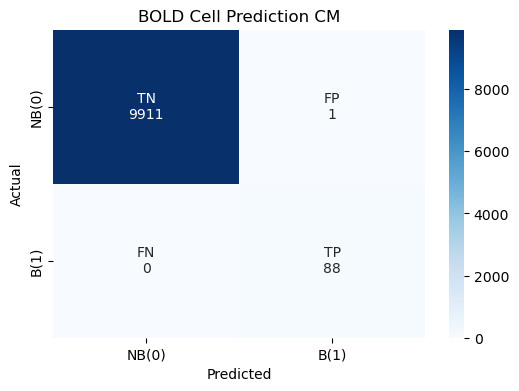


--- Predicted Grid (1 = Bold, 0 = Not Bold) ---


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
4,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
5,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
6,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
11,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0



--- Actual Grid (1 = Bold, 0 = Not Bold) ---


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
4,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
5,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
6,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
11,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Params
loc = 0
thresh = 0.6

# Inference on single position of train_loader
infer_one(
    trained_model=trained_model,
    infer_loader=train_loader,
    loc=loc,
    threshold=thresh,
    device=DEVICE,
    approach=config["approach"],
)


Filename: ../data/manual_val/portfolio-by-debt-size.xls

--- Unique Sigmoid Probabilities for Bold Cells ---
(13,0): 0.61891096830368041992
(4,2): 0.62558650970458984375
(4,14): 0.63152289390563964844
(6,0): 0.63211846351623535156
(4,18): 0.63261282444000244141
(4,16): 0.63298124074935913086
(4,12): 0.63697010278701782227
(4,10): 0.63737827539443969727
(4,4): 0.63781130313873291016
(17,0): 0.63882762193679809570
(4,8): 0.63898724317550659180
(9,0): 0.63999843597412109375
(6,1): 0.64023303985595703125
(4,6): 0.64072090387344360352
(9,1): 0.64141952991485595703
(8,1): 0.64181292057037353516
(21,0): 0.64207142591476440430
(7,1): 0.64251112937927246094
(0,0): 0.64506739377975463867
(5,3): 0.64581972360610961914
(5,0): 0.64634197950363159180
(5,2): 0.64647132158279418945

NB to B ratio: Predicted = 9907:93 | Actual = 9908:92
Accuracy: 99.99% | Precision: 98.92% | Recall: 100.00% | F1-Score: 0.99



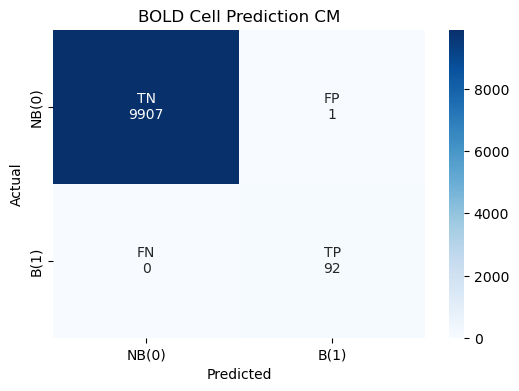


--- Predicted Grid (1 = Bold, 0 = Not Bold) ---


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
4,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
5,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
6,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
11,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0



--- Actual Grid (1 = Bold, 0 = Not Bold) ---


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
4,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
5,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
6,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
10,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
11,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [14]:
# Inference on single position of val_loader
infer_one(
    trained_model=trained_model,
    infer_loader=val_loader,
    loc=loc,
    threshold=thresh,
    device=DEVICE,
    approach=config["approach"],
)


Filename: ../data/manual_test/harassment-bullying-on-basis-of-disability-reported.xlsx

--- Unique Sigmoid Probabilities for Bold Cells ---
(4,11): 0.62723940610885620117
(4,5): 0.63156849145889282227
(3,1): 0.63279807567596435547
(5,3): 0.63958436250686645508
(3,2): 0.64149725437164306641
(5,4): 0.64289969205856323242
(5,18): 0.64313501119613647461
(3,23): 0.64380276203155517578
(4,9): 0.64446949958801269531
(1,1): 0.64480882883071899414
(3,3): 0.64488542079925537109
(4,15): 0.64498192071914672852
(4,13): 0.64510613679885864258
(3,17): 0.64518445730209350586
(4,7): 0.64543521404266357422
(3,21): 0.64551520347595214844
(3,24): 0.64563709497451782227
(4,3): 0.64564836025238037109
(3,19): 0.64568531513214111328

NB to B ratio: Predicted = 9931:69 | Actual = 9931:69
Accuracy: 100.00% | Precision: 100.00% | Recall: 100.00% | F1-Score: 1.00



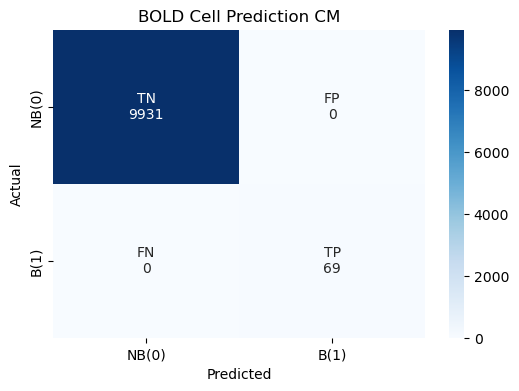


--- Predicted Grid (1 = Bold, 0 = Not Bold) ---


,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
4,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
5,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0



--- Actual Grid (1 = Bold, 0 = Not Bold) ---


,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
4,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
5,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0


In [15]:
# Inference on single position of test_loader
infer_one(
    trained_model=trained_model,
    infer_loader=test_loader,
    loc=loc,
    threshold=thresh,
    device=DEVICE,
    approach=config["approach"],
)

In [ ]:
infer_full(
    trained_model=trained_model,
    infer_loader=train_loader,
    batch_size=40,
    threshold=thresh,
    device=DEVICE,
    approach=config["approach"],
)

Batch Inference: 100%|██████████| 1/1 [00:25<00:00, 25.17s/it]


--- Aggregated Metrics Across All Batches ---

NB to B ratio: Predicted = 49573:427 | Actual = 49602:398
Accuracy: 99.94% | Precision: 93.21% | Recall: 100.00% | F1-Score: 0.96



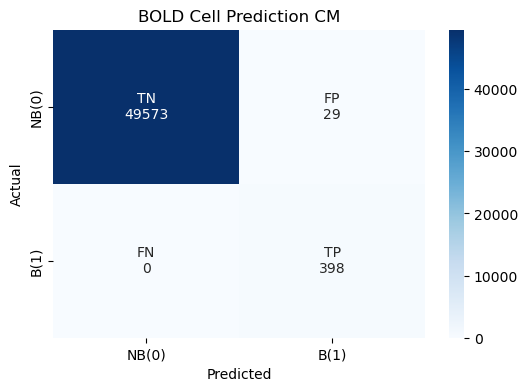

In [9]:
infer_full(
    trained_model=trained_model,
    infer_loader=val_loader,
    batch_size=8,
    threshold=thresh,
    device=DEVICE,
    approach=config["approach"],
)

Batch Inference: 100%|██████████| 1/1 [00:25<00:00, 25.13s/it]


--- Aggregated Metrics Across All Batches ---

NB to B ratio: Predicted = 49543:457 | Actual = 49606:394
Accuracy: 99.84% | Precision: 84.46% | Recall: 97.97% | F1-Score: 0.91



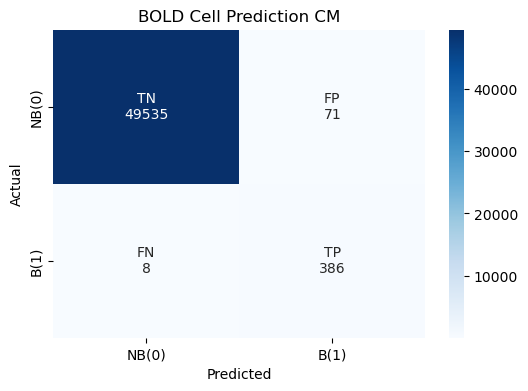

In [11]:
infer_full(
    trained_model=trained_model,
    infer_loader=test_loader,
    batch_size=10,
    threshold=thresh,
    device=DEVICE,
    approach=config["approach"],
)